In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

Loading data

In [2]:
data = pd.read_csv('../data/mergedleagues.csv')

In [3]:
data = data.loc[1862:3561,]

In [4]:
data

,Date,Home,xG_Home,xG_Away,Away,Referee,xGA_Home,xGA_Away,Home_Fatigue,Away_Fatigue,Temp,Humidity,Wind,Referee_Bias,G_Home,G_Away,Result
1862,10-08-2018 20:00,Borussia Dortmund,1.0,0.5,Bayer Leverkusen,Felix Brych,0.9,0.3,Low,Low,Low,High,High,Away,1,2,Away
1863,11-08-2018 12:30,Borussia M'gladbach,0.7,1.0,Hertha BSC,Sascha Stegemann,0.6,0.8,Moderate,Moderate,Moderate,High,Moderate,Home,0,2,Away
1864,11-08-2018 15:00,Union Berlin,0.2,4.4,Greuther Fürth,Marco Fritz,0.2,4.4,High,High,Moderate,Moderate,Low,Away,0,5,Away
1865,11-08-2018 15:00,Bayer Leverkusen,1.3,1.1,Arminia Bielefeld,Felix Brych,0.7,1.1,Moderate,Moderate,Moderate,Moderate,Moderate,Away,2,1,Home
1866,11-08-2018 15:00,Borussia M'gladbach,1.8,1.8,Bayer Leverkusen,Deniz Aytekin,0.9,0.3,Moderate,Moderate,Low,High,Low,Home,2,1,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,11-02-2023 15:00,FC Köln,1.4,0.5,Mainz 05,Felix Brych,1.3,0.4,Low,Low,Moderate,Low,Moderate,Away,1,1,Draw
3558,11-02-2023 15:00,Augsburg,0.4,1.3,Bayer Leverkusen,Deniz Aytekin,0.4,1.2,Moderate,Moderate,Moderate,High,Moderate,Home,0,3,Away
3559,11-02-2023 15:00,VfB Stuttgart,1.1,1.1,Augsburg,Daniel Siebert,1.4,0.5,Moderate,High,Moderate,High,Low,Away,2,2,Draw
3560,11-02-2023 17:30,Freiburg,0.8,1.5,Arminia Bielefeld,Felix Brych,0.8,0.9,Low,Moderate,Moderate,Moderate,Moderate,Home,2,1,Home


Datatypes of dataset columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 1862 to 3561
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1700 non-null   object 
 1   Home          1700 non-null   object 
 2   xG_Home       1700 non-null   float64
 3   xG_Away       1700 non-null   float64
 4   Away          1700 non-null   object 
 5   Referee       1700 non-null   object 
 6   xGA_Home      1700 non-null   float64
 7   xGA_Away      1700 non-null   float64
 8   Home_Fatigue  1700 non-null   object 
 9   Away_Fatigue  1700 non-null   object 
 10  Temp          1700 non-null   object 
 11  Humidity      1700 non-null   object 
 12  Wind          1700 non-null   object 
 13  Referee_Bias  1700 non-null   object 
 14  G_Home        1700 non-null   int64  
 15  G_Away        1700 non-null   int64  
 16  Result        1700 non-null   object 
dtypes: float64(4), int64(2), object(11)
memory usage: 225.9+ KB


In [6]:
data.describe()

,xG_Home,xG_Away,xGA_Home,xGA_Away,G_Home,G_Away
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,1.470824,1.269000,1.055588,0.903235,1.501176,1.312353
std,0.838435,0.778113,0.664636,0.619913,1.307604,1.248222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.800000,0.700000,0.600000,0.500000,1.000000,0.000000
50%,1.300000,1.100000,0.900000,0.800000,1.000000,1.000000
75%,2.000000,1.700000,1.400000,1.200000,2.000000,2.000000
max,5.900000,4.600000,4.300000,4.400000,9.000000,9.000000


Finding any null values

In [7]:
data.isna().sum()

Date            0
Home            0
xG_Home         0
xG_Away         0
Away            0
Referee         0
xGA_Home        0
xGA_Away        0
Home_Fatigue    0
Away_Fatigue    0
Temp            0
Humidity        0
Wind            0
Referee_Bias    0
G_Home          0
G_Away          0
Result          0
dtype: int64

Bar Plot for Expected Goals vs Actual Goals of Top 10 Home Teams

Text(0, 0.5, 'Expected Goal Assists vs Expected Goals Goals')

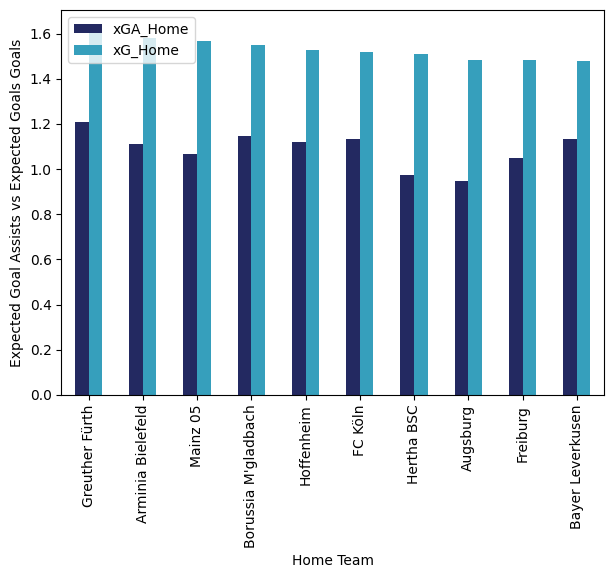

In [8]:
home_team = data.groupby('Home')[['xGA_Home','xG_Home']].mean()
home_team = pd.DataFrame(home_team)
home_team
home_team = home_team.sort_values('xG_Home', ascending=False)
home_team = home_team.reset_index()
home_team.head(10).plot(kind='bar', x='Home', y=['xGA_Home','xG_Home'], figsize=(7,5), color=['#232961','#369fbc'])
plt.xlabel('Home Team')
plt.ylabel('Expected Goal Assists vs Expected Goals Goals')


Bar Plot for Expected Goals vs Actual Goals of Top 10 Away Teams

Text(0, 0.5, 'Expected Goal Assists vs Expected Goals Goals')

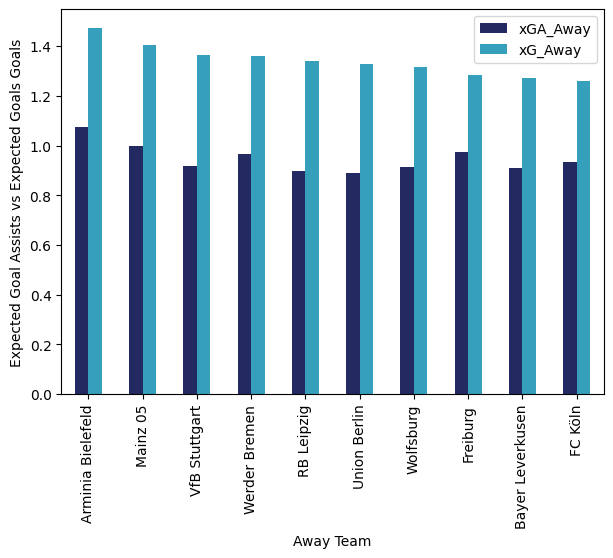

In [9]:

Away_team = data.groupby('Away')[['xGA_Away','xG_Away']].mean()
Away_team = pd.DataFrame(Away_team)
Away_team
Away_team = Away_team.sort_values('xG_Away', ascending=False)
Away_team = Away_team.reset_index()
Away_team.head(10).plot(kind='bar', x='Away', y=['xGA_Away','xG_Away'], figsize=(7,5),color=['#232961','#369fbc'])
plt.xlabel('Away Team')
plt.ylabel('Expected Goal Assists vs Expected Goals Goals')


Scatter plot for Expected Assisted Goals vs Expected Goals of Home Teams

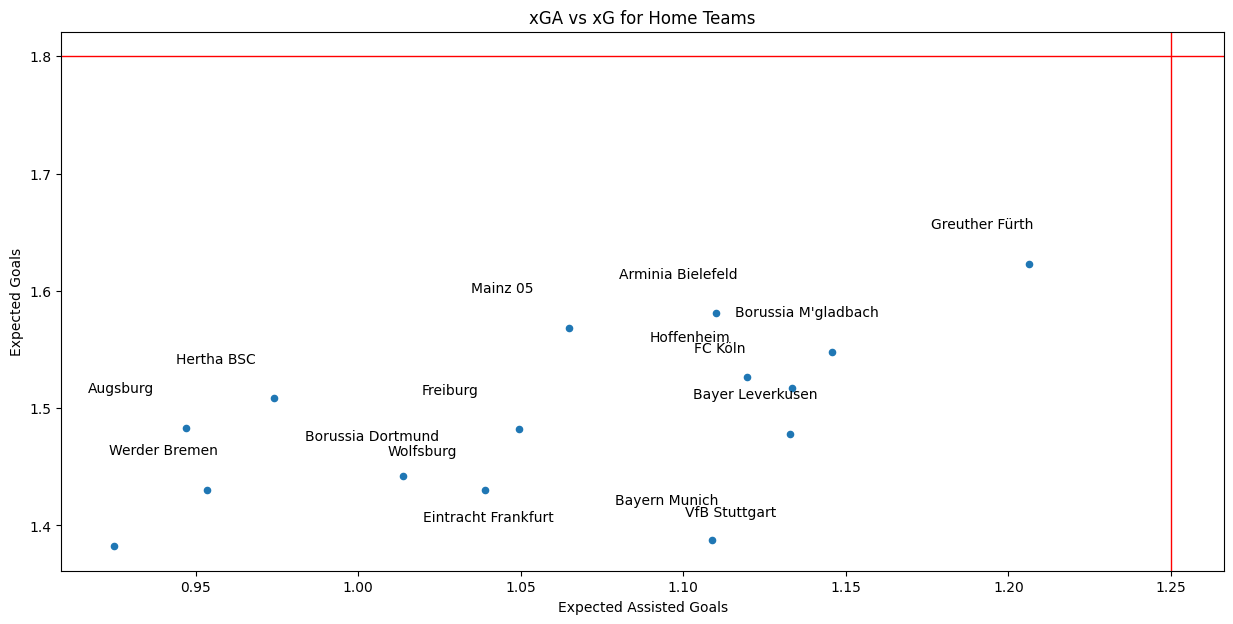

In [10]:


home_team = data.groupby('Home')[['xG_Home','xGA_Home']].mean()
home_team = pd.DataFrame(home_team)
home_team = home_team.sort_values('xG_Home', ascending=False)
home_team = home_team.reset_index()
home_team.head(15).plot(kind='scatter', x='xGA_Home', y='xG_Home', figsize=(15,7))
plt.xlabel('Expected Assisted Goals')
plt.ylabel('Expected Goals')
plt.title('xGA vs xG for Home Teams')
plt.axhline(y=1.8, color='r', linewidth=1)
plt.axvline(x=1.25, color='r', linewidth=1)

for i, txt in enumerate(home_team['Home']):
    plt.annotate(txt, (home_team['xGA_Home'][i] - 0.03, home_team['xG_Home'][i] + 0.03))




Scatter plot for Expected Assisted Goals vs Expected Goals of Away Teams

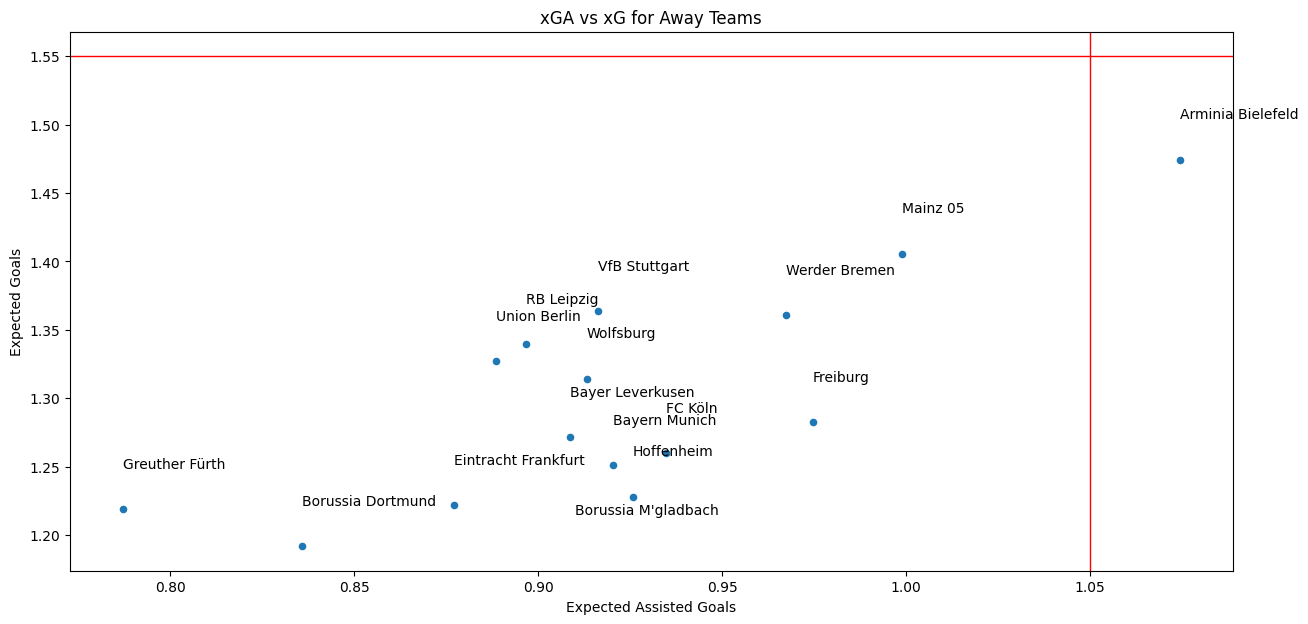

In [11]:

Away_team = data.groupby('Away')[['xG_Away','xGA_Away']].mean()
Away_team = pd.DataFrame(Away_team)
Away_team = Away_team.sort_values('xG_Away', ascending=False)
Away_team = Away_team.reset_index()
Away_team.head(15).plot(kind='scatter', x='xGA_Away', y='xG_Away', figsize=(15,7))
plt.xlabel('Expected Assisted Goals')
plt.ylabel('Expected Goals')
plt.title('xGA vs xG for Away Teams')
plt.axhline(y=1.55, color='r', linewidth=1)
plt.axvline(x=1.05, color='r', linewidth=1)


for i, txt in enumerate(Away_team['Away']):
    plt.annotate(txt, (Away_team['xGA_Away'][i], Away_team['xG_Away'][i] + 0.03))

Pie chart for referee bias value count

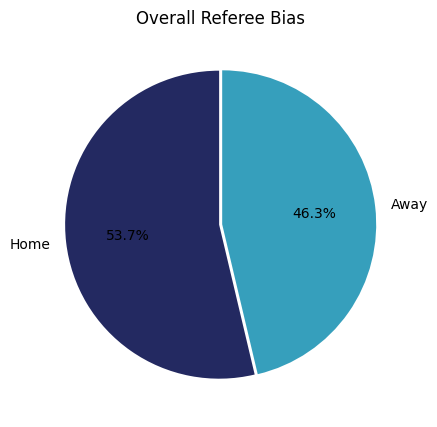

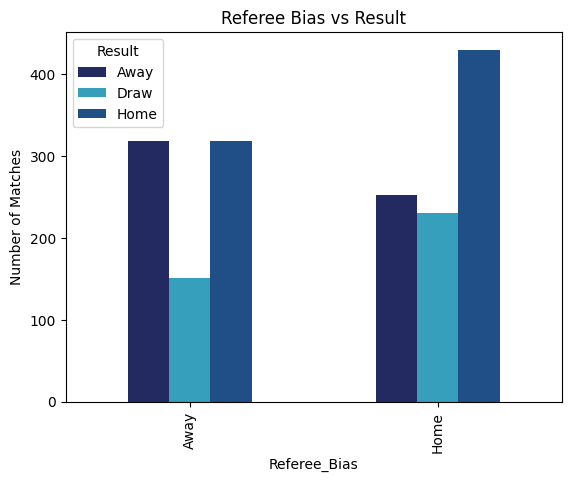

In [12]:

plt.figure(figsize=(10,5))
plt.pie(data['Referee_Bias'].value_counts(), labels=['Home','Away'], autopct='%1.1f%%', startangle=90,colors=['#232961','#369fbc'],explode=[0.01, 0.01])
plt.title('Overall Referee Bias')
crosstab = pd.crosstab(data['Referee_Bias'],data['Result'])
crosstab.plot.bar(color = ['#232961','#369fbc','#204e87'])
plt.title('Referee Bias vs Result')
plt.ylabel('Number of Matches')
plt.show()

Pie chart for home fatigue and away fatigue value count 

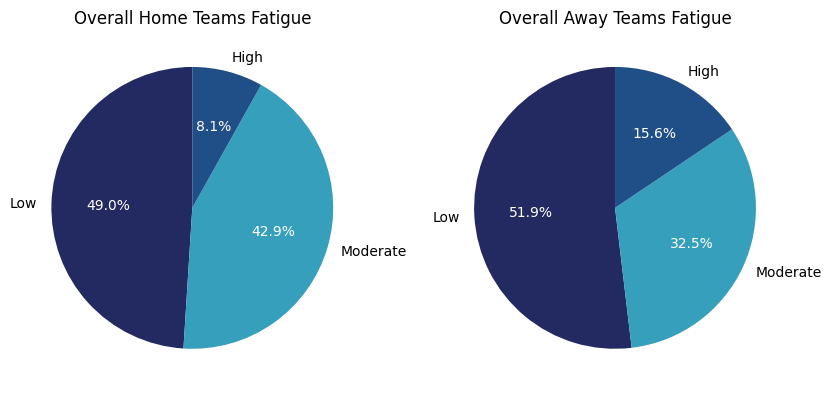

In [13]:


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
patches, texts, autotexts = plt.pie(data['Home_Fatigue'].value_counts(), labels=['Low','Moderate','High'], autopct='%1.1f%%',startangle=90,colors=['#232961','#369fbc','#204e87'])
plt.title('Overall Home Teams Fatigue')
[autotext.set_color('white') for autotext in autotexts]
plt.subplot(1,2,2)
patches, texts, autotexts = plt.pie(data['Away_Fatigue'].value_counts(), labels=['Low','Moderate','High'], autopct='%1.1f%%', startangle=90,colors=['#232961','#369fbc','#204e87'])
plt.title('Overall Away Teams Fatigue')
[autotext.set_color('white') for autotext in autotexts]
plt.show()



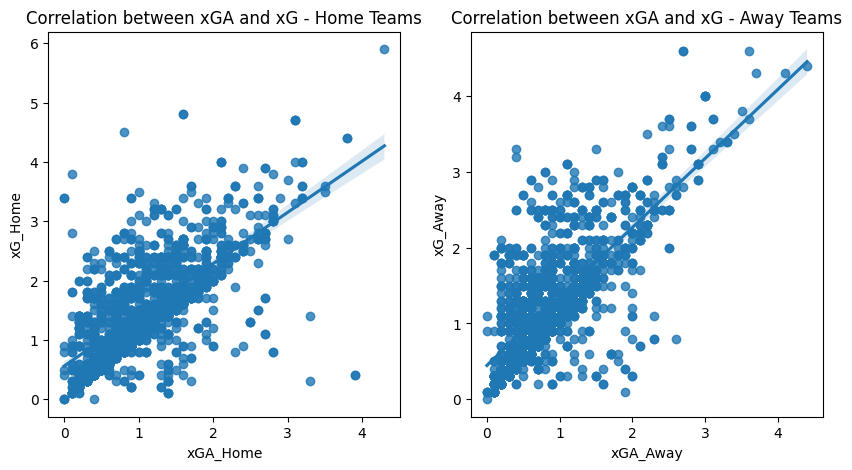

          xGA_Home   xG_Home
xGA_Home  1.000000  0.684257
xG_Home   0.684257  1.000000
          xGA_Away   xG_Away
xGA_Away  1.000000  0.726011
xG_Away   0.726011  1.000000


In [14]:
#correlation between expected home goals and actual home goals
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(x='xGA_Home', y='xG_Home', data=data)
plt.title('Correlation between xGA and xG - Home Teams')
plt.subplot(1,2,2)
sns.regplot(x='xGA_Away', y='xG_Away', data=data)
plt.title('Correlation between xGA and xG - Away Teams')
plt.show()

#correlation coeffieient between expected home goals and expected home goals
correlation1 = data[['xGA_Home','xG_Home']].corr()
print(correlation1)

#correlation coeffieient between expected away goals and actual away goals
correlation2 = data[['xGA_Away','xG_Away']].corr()
print(correlation2)

In [15]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Temp", y="xG_Away", hue="Temp" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Temp", y="xG_Home", hue="Temp" ,data=data)
# plt.show()




In [16]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Humidity", y="xG_Away", hue="Humidity" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Humidity", y="xG_Home", hue="Humidity" ,data=data)
# plt.show()




In [17]:
# plt.figure(figsize=(13,5))
# plt.subplot(1,3,1)
# sns.swarmplot(x="Wind", y="xG_Away", hue="Wind" ,data=data)
# plt.subplot(1,3,2)
# sns.swarmplot(x="Wind", y="xG_Home", hue="Wind" ,data=data)
# plt.show()




In [18]:



# # Subplot for xG_Home
# fig, axes = plt.subplots(2, 1,figsize=(12, 8))
# sns.pointplot(x='Referee_Bias', y='xG_Home', data=data,  ci='sd', ax=axes[0])
# # plt.title('xG_Home by Referee_Bias')
# # plt.xlabel('Referee_Bias')
# # plt.ylabel('xG_Home')

# # Subplot for xG_Away
# sns.pointplot(x='Referee_Bias', y='xGA_Home', data=data,  ci='sd', ax=axes[1])
# # plt.title('xG_Away by Result')
# # plt.xlabel('Result')
# # plt.ylabel('xG_Away')

# # sns.pointplot(x='Result', y='xGA_Away', data=data,  ci='sd', ax=axes[1,0])
# # # plt.title('xGA_Away by Result')
# # # plt.xlabel('Result')
# # # plt.ylabel('xGA_Away')


# # sns.pointplot(x='Result', y='xGA_Home', data=data,  ci='sd', ax=axes[1,1])
# # # plt.title('xGA_Home by Result')
# # # plt.xlabel('Result')
# # # plt.ylabel('xGA_Home')




In [19]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data
num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:
        model = ols(f'{home_level} ~ Referee_Bias', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Referee_Bias']
        p_value = anova_results['PR(>F)']['Referee_Bias']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\4001309981.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\4001309981.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\4001309981.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will

,Variable,F-Statistic,P-Value,eta
0,xG_Home,11.445850,0.000733,0.006696
0,xG_Away,0.090097,0.764091,0.000053
0,xGA_Home,10.786408,0.001043,0.006312
0,xGA_Away,0.737564,0.390564,0.000434


In [20]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Home_Fatigue', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Home_Fatigue']
        p_value = anova_results['PR(>F)']['Home_Fatigue']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2796385453.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2796385453.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2796385453.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will

,Variable,F-Statistic,P-Value,eta
0,xG_Home,3.727347,0.024254,0.004374
0,xG_Away,3.749734,0.023719,0.004400
0,xGA_Home,3.178268,0.041906,0.003732
0,xGA_Away,4.747458,0.008789,0.005564


In [21]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Away_Fatigue', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Away_Fatigue']
        p_value = anova_results['PR(>F)']['Away_Fatigue']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2577399383.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2577399383.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will

,Variable,F-Statistic,P-Value,eta
0,xG_Home,7.780779,0.000433,0.009087
0,xG_Away,8.715849,0.000171,0.010168
0,xGA_Home,2.475242,0.084446,0.002909
0,xGA_Away,6.023635,0.002473,0.007049


In [22]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Temp', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Temp']
        p_value = anova_results['PR(>F)']['Temp']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])


C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3831054091.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3831054091.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will

,Variable,F-Statistic,P-Value,eta
0,xG_Home,0.279727,0.756025,0.000330
0,xG_Away,1.221465,0.295057,0.001437
0,xGA_Home,2.803171,0.060898,0.003293
0,xGA_Away,3.954479,0.019346,0.004639


In [23]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Humidity', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Humidity']
        p_value = anova_results['PR(>F)']['Humidity']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\1208712932.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\1208712932.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\1208712932.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will

,Variable,F-Statistic,P-Value,eta
0,xG_Home,5.767264,0.003190,0.006751
0,xG_Away,5.234872,0.005414,0.006132
0,xGA_Home,5.023070,0.006683,0.005885
0,xGA_Away,1.687634,0.185267,0.001985


In [24]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = data


num_levels = ["xG_Home", "xG_Away","xGA_Home","xGA_Away"]
f_test_results = pd.DataFrame(columns=['Variable','F-Statistic', 'P-Value','eta'])

for home_level in num_levels:

        model = ols(f'{home_level} ~ Wind', data=data).fit()
        anova_results = anova_lm(model)
        f_stat = anova_results['F']['Wind']
        p_value = anova_results['PR(>F)']['Wind']
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])

        new_row = pd.DataFrame([{'Variable':home_level,'F-Statistic': f_stat, 'P-Value': p_value, 'eta': eta_squared}])
        f_test_results = pd.concat([f_test_results, new_row])
        
f_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\1808189195.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_results['sum_sq'][0] / (anova_results['sum_sq'][0] + anova_results['sum_sq'][1])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\1808189195.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  f_test_results = pd.concat([f_test_results, new_row])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\1808189195.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will

,Variable,F-Statistic,P-Value,eta
0,xG_Home,0.180953,0.834490,0.000213
0,xG_Away,0.246968,0.781194,0.000291
0,xGA_Home,0.989796,0.371867,0.001165
0,xGA_Away,1.119569,0.326661,0.001318


In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Referee_Bias']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Referee Bias.")
else:
    print("There is no significant association between Football Result and Referee Bias.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result        Away  Draw  Home
Referee_Bias                  
Away           318   151   318
Home           252   231   430


Chi-square statistic: 32.003068386583216
P-value: 1.1236265638121214e-07

Significance Test:
There is a significant association between Football Result and Referee Bias.


Result        Away  Draw  Home
Home_Fatigue                  
High            41    24    73
Low            269   201   363
Moderate       260   157   312


Chi-square statistic: 7.61656751667435
P-value: 0.10667765677601687

Significance Test:
There is no significant association between Football Result and Home_Fatigue.


<Axes: xlabel='Home_Fatigue'>

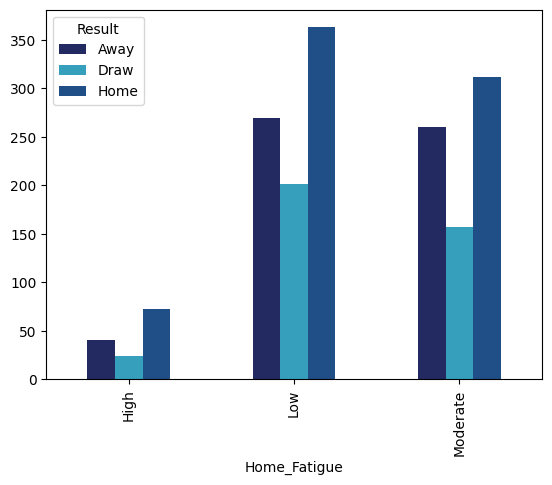

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Home_Fatigue']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Home_Fatigue.")
else:
    print("There is no significant association between Football Result and Home_Fatigue.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Away_Fatigue']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Away_Fatigue.")
else:
    print("There is no significant association between Football Result and Away_Fatigue.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result        Away  Draw  Home
Away_Fatigue                  
High            84    62   119
Low            160   149   244
Moderate       326   171   385


Chi-square statistic: 15.679708039010759
P-value: 0.003480484897213142

Significance Test:
There is a significant association between Football Result and Away_Fatigue.


In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Temp']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Temperature.")
else:
    print("There is no significant association between Football Result and Temperature.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Temp                      
High        11     7    11
Low        234   155   316
Moderate   325   220   421


Chi-square statistic: 0.7342321432047753
P-value: 0.9470412693238668

Significance Test:
There is no significant association between Football Result and Temperature.


In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Humidity']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Humidity.")
else:
    print("There is no significant association between Football Result and Humidity.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Humidity                  
High       335   217   435
Low         21    17    19
Moderate   214   148   294


Chi-square statistic: 3.449715058473302
P-value: 0.4855653555695688

Significance Test:
There is no significant association between Football Result and Humidity.


In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

df = data

contingency_table = pd.crosstab([df['Wind']], df['Result'])
print(contingency_table)
print()
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("P-value:", p)

alpha = 0.05 
print("\nSignificance Test:")
if p < alpha:
    print("There is a significant association between Football Result and Wind.")
else:
    print("There is no significant association between Football Result and Wind.")


# n = contingency_table.sum().sum()
# dof = min(contingency_table.shape)-1
# print(dof)
# v = np.sqrt(chi2/(n*dof))
# print(f'V = {v}')

# contingency_table.plot(kind="bar", color = ['#232961','#369fbc','#204e87'])

# plt.figure(figsize=(8, 6))
# sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=True, square=True)
# plt.title('Contingency Table: Temperature vs. Result')
# plt.xlabel('Result')
# plt.ylabel('Temperature')
# plt.show()

Result    Away  Draw  Home
Wind                      
High        36    30    42
Low        273   228   410
Moderate   261   124   296


Chi-square statistic: 18.526233930187924
P-value: 0.00097355097324046

Significance Test:
There is a significant association between Football Result and Wind.


In [31]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest


df = data


fatigue_levels = ["Low", "Moderate", "High"]

z_test_results = pd.DataFrame(columns=['Home_Fatigue','Away_Fatigue','Z-Statistic', 'P-Value','Significant Difference'])

for home_level in fatigue_levels:
    for away_level in fatigue_levels:

        home_data = df[df["Home_Fatigue"] == home_level]["xG_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xG_Away"]


        z_stat, p_value = ztest(home_data, away_data)
        if p_value < 0.05:
            significant_diff = "Yes"
        else:
            significant_diff = "No"
        
        new_row = pd.DataFrame([{'Home_Fatigue':home_level,'Away_Fatigue':away_level,'Z-Statistic': z_stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        z_test_results = pd.concat([z_test_results, new_row])

z_test_results

C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3194791706.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  z_test_results = pd.concat([z_test_results, new_row])


,Home_Fatigue,Away_Fatigue,Z-Statistic,P-Value,Significant Difference
0,Low,Low,6.156227,7.449842e-10,Yes
0,Low,Moderate,3.097809,1.949571e-03,Yes
0,Low,High,5.647650,1.626561e-08,Yes
0,Moderate,Low,6.644250,3.047652e-11,Yes
0,Moderate,Moderate,3.979221,6.914151e-05,Yes
0,Moderate,High,5.897725,3.685486e-09,Yes
0,High,Low,1.325804,1.849048e-01,No
0,High,Moderate,-0.545967,5.850885e-01,No
0,High,High,1.773405,7.616164e-02,No


C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3520716755.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3520716755.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3520716755.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, awa

  Home_Fatigue Away_Fatigue            Test Type  Statistic       P-Value  \
0          Low          Low  Mann-Whitney U Test   276060.5  3.528937e-10   
1          Low     Moderate  Mann-Whitney U Test   405332.5  2.084329e-04   
2          Low         High  Mann-Whitney U Test   136867.0  3.683483e-09   
3     Moderate          Low  Mann-Whitney U Test   242231.5  5.683767e-10   
4     Moderate     Moderate  Mann-Whitney U Test   357086.0  1.263863e-04   
5     Moderate         High  Mann-Whitney U Test   119986.0  4.925807e-09   
6         High          Low  Mann-Whitney U Test    39160.5  6.321772e-01   
7         High     Moderate  Mann-Whitney U Test    57168.0  2.511421e-01   
8         High         High  Mann-Whitney U Test    19446.0  2.950512e-01   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  
3                    Yes  
4                    Yes  
5                    Yes  
6                     No  
7            

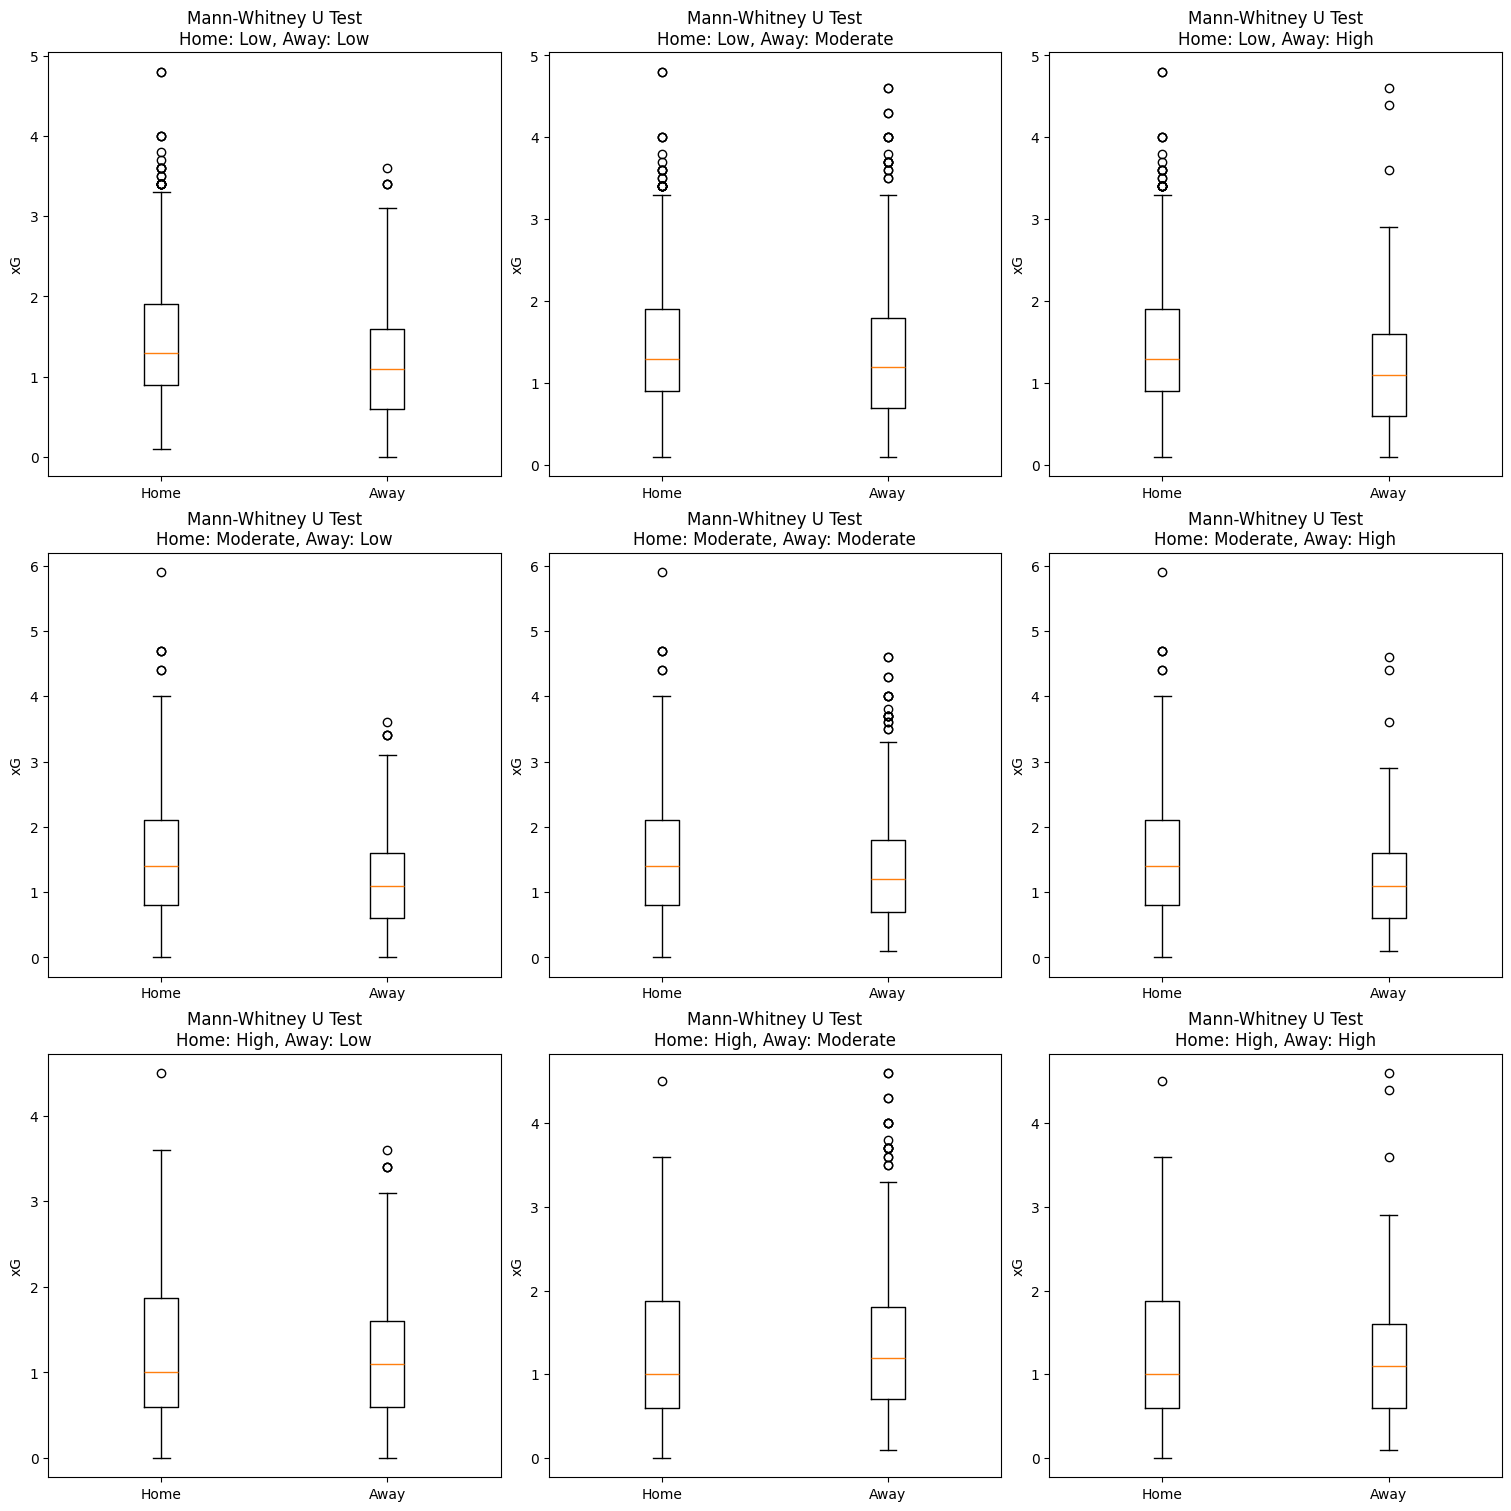

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
fatigue_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Home_Fatigue', 'Away_Fatigue', 'Test Type', 'Statistic', 'P-Value', 'Significant Difference'])

fig, axes = plt.subplots(nrows=len(fatigue_levels), ncols=len(fatigue_levels), figsize=(15, 15), constrained_layout=True)

for i, home_level in enumerate(fatigue_levels):
    for j, away_level in enumerate(fatigue_levels):
        home_data = df[df["Home_Fatigue"] == home_level]["xG_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xG_Away"]

        # Check for normality
        home_normality = normaltest(home_data)
        away_normality = normaltest(away_data)

        if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
            # Perform z-test if both samples are normally distributed
            test_type = 'Z-Test'
            z_stat, p_value = ztest(home_data, away_data)
            stat = z_stat
        else:
            # Perform Mann-Whitney U test if at least one sample is not normally distributed
            test_type = 'Mann-Whitney U Test'
            u_stat, p_value = mannwhitneyu(home_data, away_data)
            stat = u_stat

        significant_diff = "Yes" if p_value < 0.05 else "No"

        new_row = pd.DataFrame([{'Home_Fatigue': home_level, 'Away_Fatigue': away_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        results = pd.concat([results, new_row], ignore_index=True)

        # Plot the data
        axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
        axes[i, j].set_title(f'{test_type}\nHome: {home_level}, Away: {away_level}')
        axes[i, j].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2867954313.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2867954313.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2867954313.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, j].boxplot([home_data, awa

  Home_Fatigue Away_Fatigue            Test Type  Statistic       P-Value  \
0          Low          Low  Mann-Whitney U Test   284231.5  1.355269e-13   
1          Low     Moderate  Mann-Whitney U Test   413373.0  6.898878e-06   
2          Low         High  Mann-Whitney U Test   127936.0  9.144965e-05   
3     Moderate          Low  Mann-Whitney U Test   244511.0  5.668620e-11   
4     Moderate     Moderate  Mann-Whitney U Test   357014.0  1.290703e-04   
5     Moderate         High  Mann-Whitney U Test   110678.0  4.241659e-04   
6         High          Low  Mann-Whitney U Test    42037.0  6.375442e-02   
7         High     Moderate  Mann-Whitney U Test    60445.5  8.979382e-01   
8         High         High  Mann-Whitney U Test    18698.0  7.095285e-01   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  
3                    Yes  
4                    Yes  
5                    Yes  
6                     No  
7            

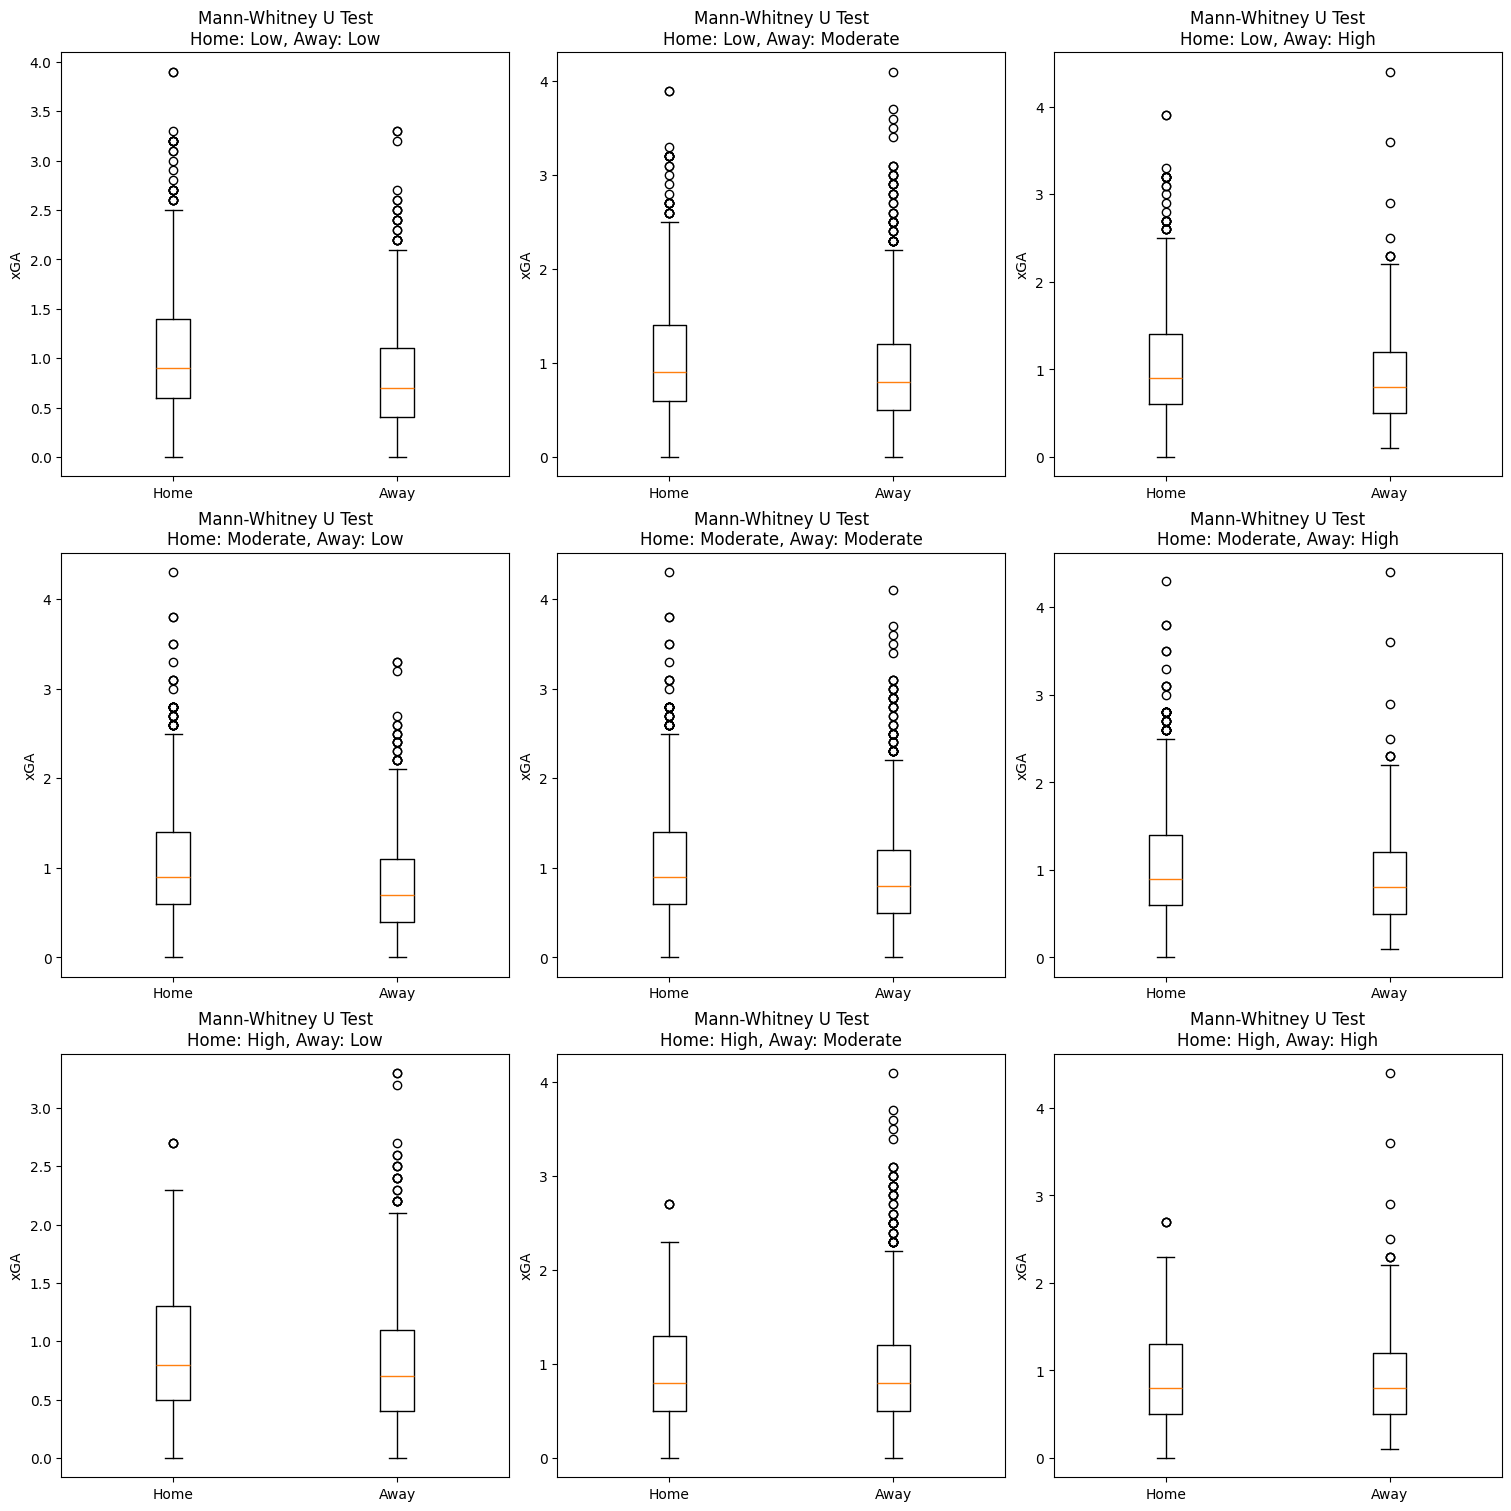

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt



fatigue_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Home_Fatigue', 'Away_Fatigue', 'Test Type', 'Statistic', 'P-Value', 'Significant Difference'])

fig, axes = plt.subplots(nrows=len(fatigue_levels), ncols=len(fatigue_levels), figsize=(15, 15), constrained_layout=True)

for i, home_level in enumerate(fatigue_levels):
    for j, away_level in enumerate(fatigue_levels):
        home_data = df[df["Home_Fatigue"] == home_level]["xGA_Home"]
        away_data = df[df["Away_Fatigue"] == away_level]["xGA_Away"]

        # Check for normality
        home_normality = normaltest(home_data)
        away_normality = normaltest(away_data)

        if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
            # Perform z-test if both samples are normally distributed
            test_type = 'Z-Test'
            z_stat, p_value = ztest(home_data, away_data)
            stat = z_stat
        else:
            # Perform Mann-Whitney U test if at least one sample is not normally distributed
            test_type = 'Mann-Whitney U Test'
            u_stat, p_value = mannwhitneyu(home_data, away_data)
            stat = u_stat

        significant_diff = "Yes" if p_value < 0.05 else "No"

        new_row = pd.DataFrame([{'Home_Fatigue': home_level, 'Away_Fatigue': away_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
        results = pd.concat([results, new_row], ignore_index=True)

        # Plot the data
        axes[i, j].boxplot([home_data, away_data], labels=['Home', 'Away'])
        axes[i, j].set_title(f'{test_type}\nHome: {home_level}, Away: {away_level}')
        axes[i, j].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3113352540.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type  Statistic       P-Value  \
0      NaN  Mann-Whitney U Test   283122.5  5.760603e-06   
1      NaN  Mann-Whitney U Test   535395.0  1.890095e-08   
2      NaN  Mann-Whitney U Test      616.5  2.231627e-03   

  Significant Difference      Temp  
0                    Yes       Low  
1                    Yes  Moderate  
2                    Yes      High  


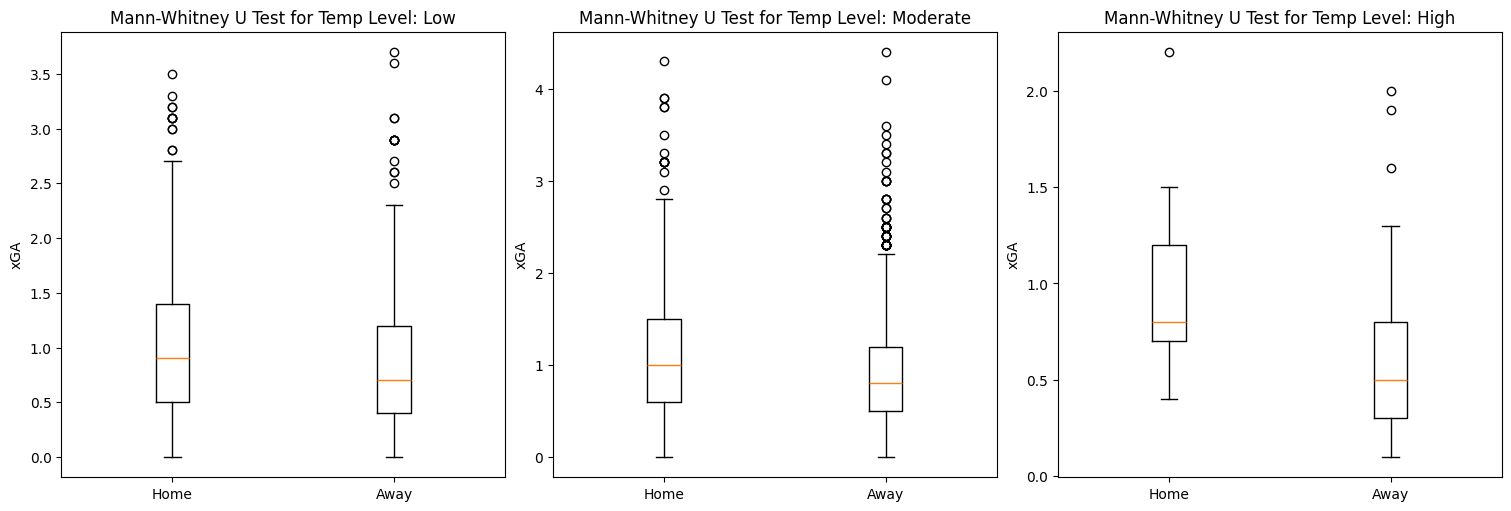

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Temp"] == home_level]["xGA_Home"]
    away_data = df[df["Temp"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Temp': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Temp Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2281937181.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


   Humidity            Test Type  Statistic       P-Value  \
0       Low  Mann-Whitney U Test     1443.5  3.054658e-01   
1  Moderate  Mann-Whitney U Test   258312.0  3.121685e-10   
2      High  Mann-Whitney U Test   546088.5  3.098027e-06   

  Significant Difference  
0                     No  
1                    Yes  
2                    Yes  


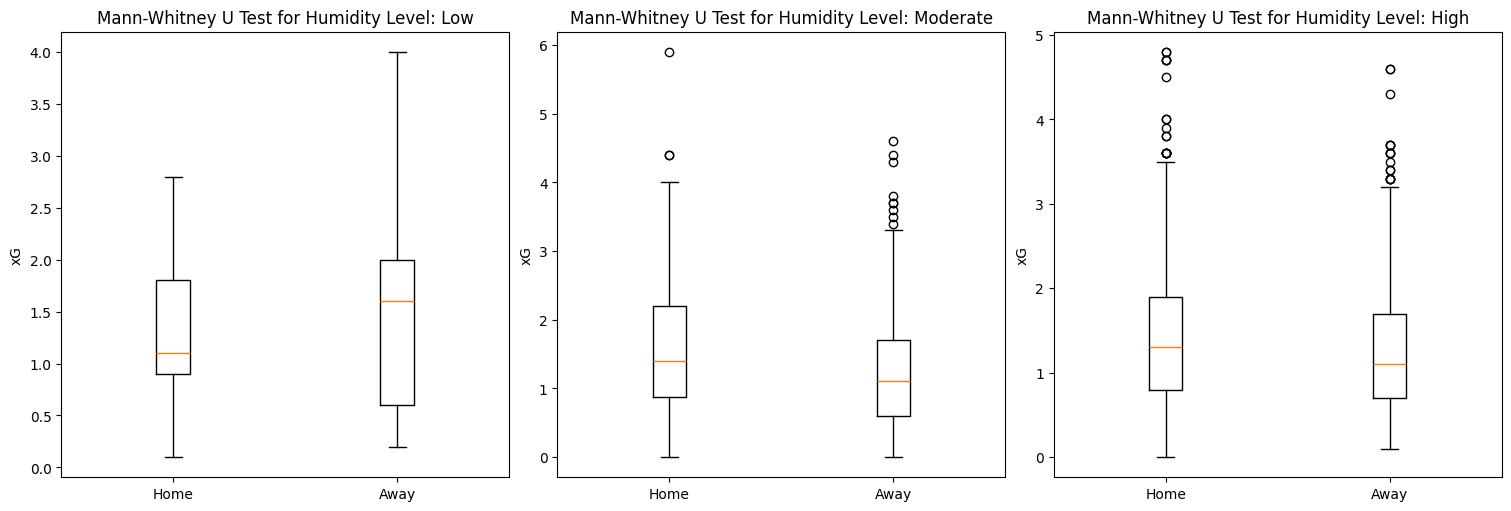

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Humidity"] == home_level]["xG_Home"]
    away_data = df[df["Humidity"] == home_level]["xG_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Humidity': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Humidity Level: {home_level}')
    axes[i].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\1647458132.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


   Humidity            Test Type  Statistic       P-Value  \
0       Low  Mann-Whitney U Test     2024.5  2.311550e-02   
1  Moderate  Mann-Whitney U Test   263134.5  2.531369e-12   
2      High  Mann-Whitney U Test   531820.5  4.019245e-04   

  Significant Difference  
0                    Yes  
1                    Yes  
2                    Yes  


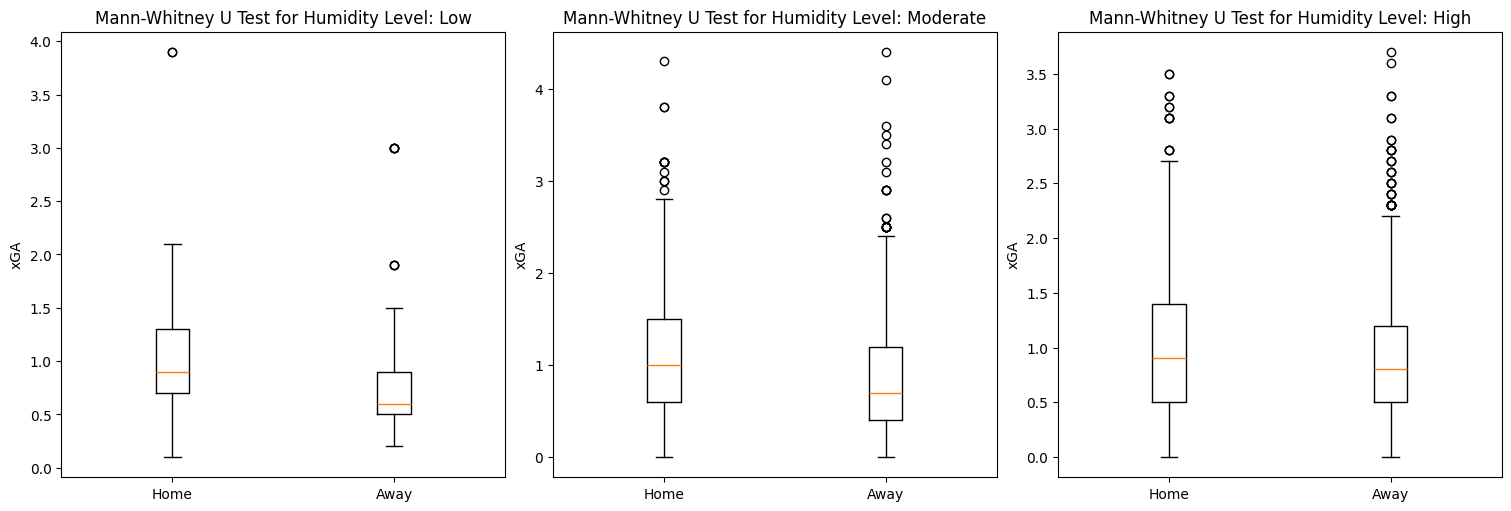

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Humidity"] == home_level]["xGA_Home"]
    away_data = df[df["Humidity"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Humidity': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Humidity Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\3640864810.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type  Statistic       P-Value  \
0      NaN  Mann-Whitney U Test   471842.5  3.974383e-07   
1      NaN  Mann-Whitney U Test   266055.5  2.441974e-06   
2      NaN  Mann-Whitney U Test     6886.5  2.157247e-02   

  Significant Difference      Wind  
0                    Yes       Low  
1                    Yes  Moderate  
2                    Yes      High  


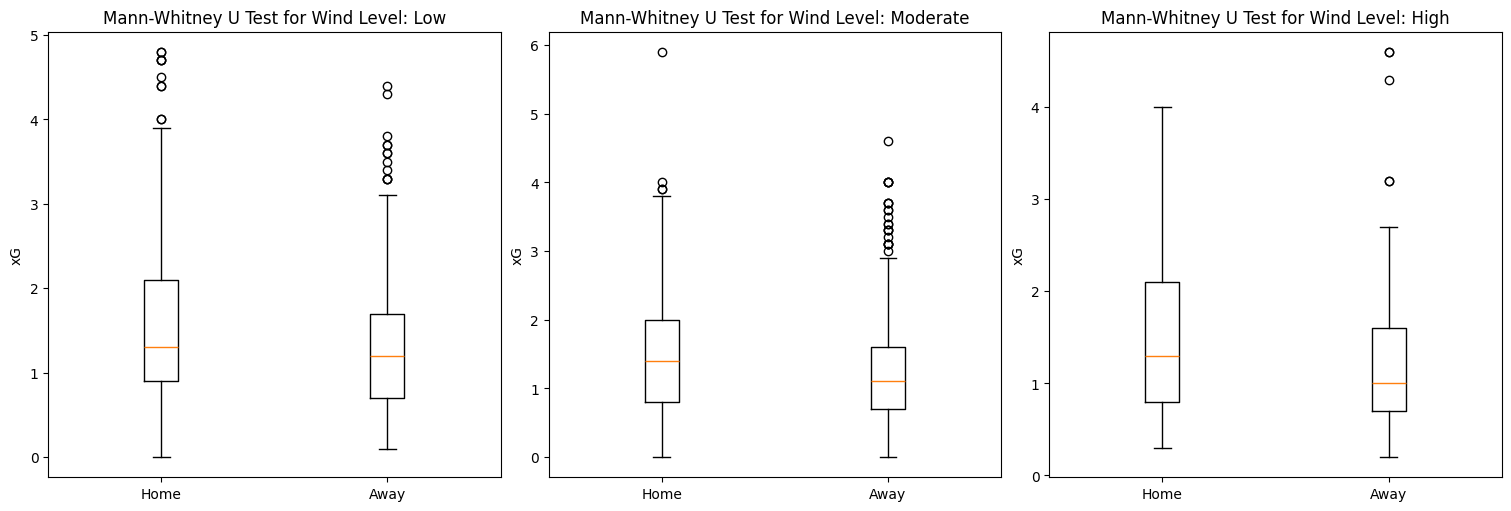

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Wind"] == home_level]["xG_Home"]
    away_data = df[df["Wind"] == home_level]["xG_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Wind': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Wind Level: {home_level}')
    axes[i].set_ylabel('xG')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()


C:\Users\Disha\AppData\Local\Temp\ipykernel_3248\2676737873.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


  Humidity            Test Type  Statistic       P-Value  \
0      NaN  Mann-Whitney U Test   490244.5  1.871493e-11   
1      NaN  Mann-Whitney U Test   252175.5  5.097532e-03   
2      NaN  Mann-Whitney U Test     7270.0  1.705777e-03   

  Significant Difference      Wind  
0                    Yes       Low  
1                    Yes  Moderate  
2                    Yes      High  


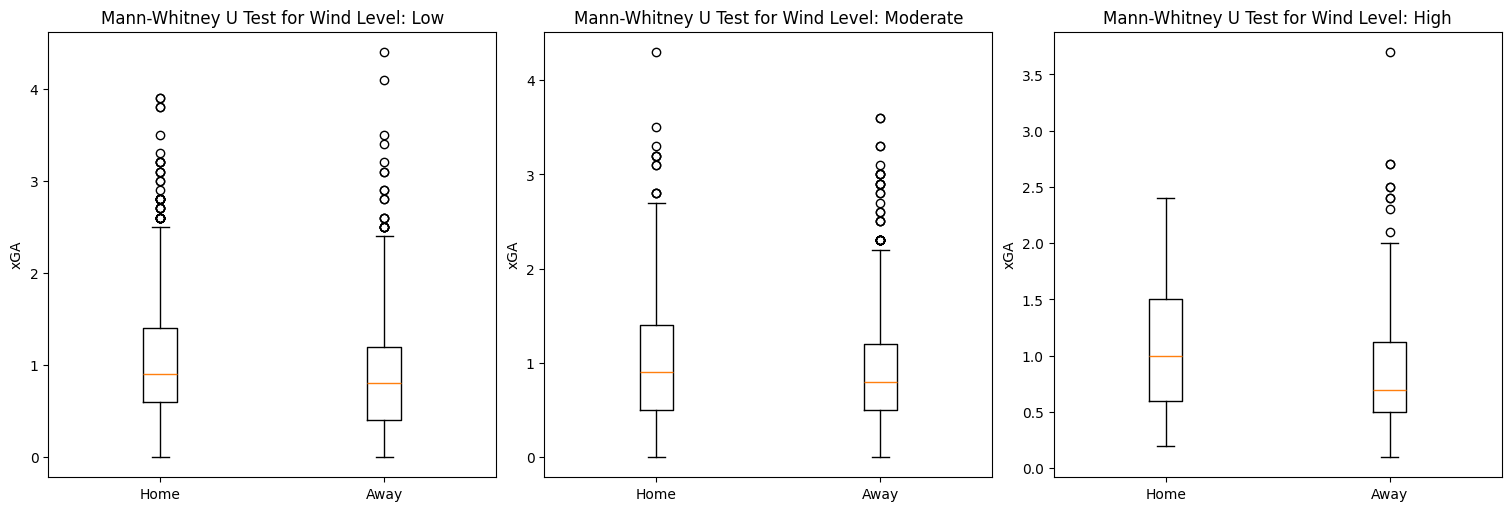

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

df = data
Temp_levels = ["Low", "Moderate", "High"]
results = pd.DataFrame(columns=['Humidity','Test Type', 'Statistic', 'P-Value','Significant Difference'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), constrained_layout=True)

for i, home_level in enumerate(Temp_levels):
    home_data = df[df["Wind"] == home_level]["xGA_Home"]
    away_data = df[df["Wind"] == home_level]["xGA_Away"]

    # Check for normality
    home_normality = normaltest(home_data)
    away_normality = normaltest(away_data)

    if home_normality.pvalue > 0.05 and away_normality.pvalue > 0.05:
        # Perform z-test if both samples are normally distributed
        test_type = 'Z-Test'
        z_stat, p_value = ztest(home_data, away_data)
        stat = z_stat
    else:
        # Perform Mann-Whitney U test if at least one sample is not normally distributed
        test_type = 'Mann-Whitney U Test'
        u_stat, p_value = mannwhitneyu(home_data, away_data)
        stat = u_stat

    significant_diff = "Yes" if p_value < 0.05 else "No"

    new_row = pd.DataFrame([{'Wind': home_level, 'Test Type': test_type, 'Statistic': stat, 'P-Value': p_value, 'Significant Difference': significant_diff}])
    results = pd.concat([results, new_row], ignore_index=True)

    # Plot the data
    axes[i].boxplot([home_data, away_data], tick_labels=['Home', 'Away'])
    axes[i].set_title(f'{test_type} for Wind Level: {home_level}')
    axes[i].set_ylabel('xGA')

# Display the results DataFrame
print(results)

# Show the plots
plt.show()
